# Heat map approximation

In [9]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%autoreload
import heat_maps
import utils
import itertools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.set(color_codes=True)
           

## Load sample data

In [11]:
hm = heat_maps.read('test_hm_1.bmp')
print hm.shape


(180, 320)


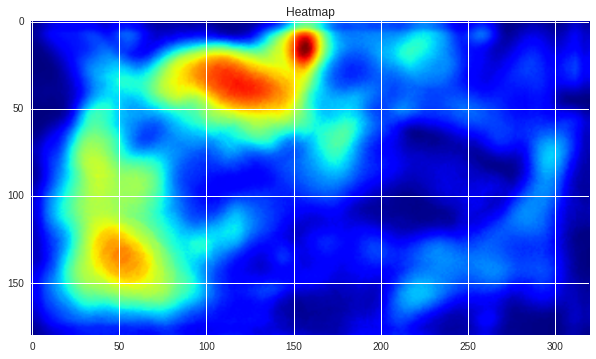

In [12]:
utils.draw_2d(hm, title='Heatmap')


## Fit B-spline surface

In [13]:
tck = heat_maps.fit(hm)


## Approximate heat map values

In [14]:
X, Y = np.arange(0.0, hm.shape[1], 1.0), np.arange(0.0, hm.shape[0], 1.0)
hm_approx = heat_maps.approx(tck, X, Y)
print hm_approx.shape


(180, 320)


In [15]:
# approximate within area
hm_area = hm[0:50, 0:50]
print hm_area.shape

AX, AY= np.arange(0.0, 50.0, 1.0), np.arange(0.0, 50.0, 1.0)
hm_approx_area = heat_maps.approx(tck, AX, AY)
print hm_approx_area.shape


(50, 50)
(50, 50)


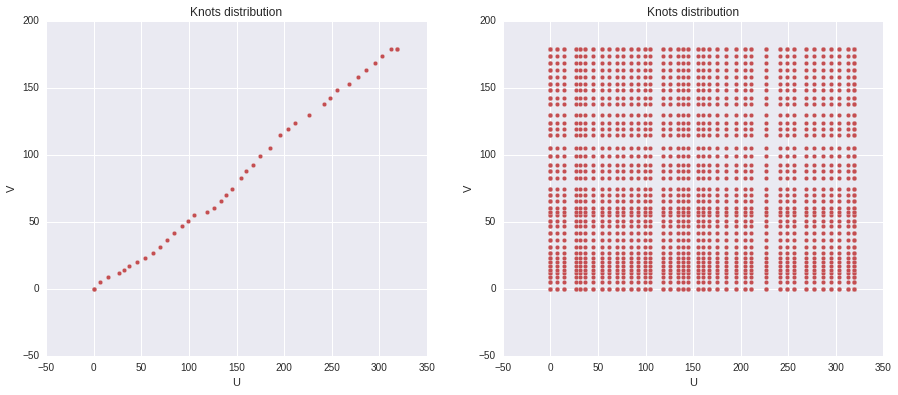

In [16]:
p = itertools.product(tck[0], tck[1]);
points = np.array(list(p))

f, ax = plt.subplots(1, 2, figsize=(15, 6))

m = min(len(tck[0]), len(tck[1]))
ax[0].scatter(tck[0][:m], tck[1][:m], c='r')
ax[0].set_xlabel('U')
ax[0].set_ylabel('V')
ax[0].set_title('Knots distribution')

ax[1].scatter(points[:,0], points[:, 1] , c='r')
ax[1].set_xlabel('U')
ax[1].set_ylabel('V')
ax[1].set_title('Knots distribution')


In [17]:
print 'Total size: {:} KB'.format((tck[0].nbytes + tck[1].nbytes + tck[2].nbytes) / 1024)
print 'Knots: {:} {:}'.format(len(tck[0]), len(tck[1]))
print 'Coefficients: {:}\n'.format(len(tck[2]))

print 'Original:\n{:}\n'.format(hm[100:200, 100:200])
print 'Approximation:\n{:}\n'.format(np.round(hm_approx[100:200, 100:200]))


Total size: 13 KB
Knots: 45 44
Coefficients: 1640

Original:
[[ 29.  27.  27. ...,  12.  12.  11.]
 [ 28.  27.  28. ...,  11.  10.  10.]
 [ 30.  29.  28. ...,  10.   9.   8.]
 ..., 
 [ 23.  22.  22. ...,  23.  24.  25.]
 [ 22.  22.  23. ...,  26.  27.  24.]
 [ 24.  24.  24. ...,  26.  27.  28.]]

Approximation:
[[ 28.  28.  27. ...,  12.  11.  11.]
 [ 28.  28.  28. ...,  11.  10.  10.]
 [ 29.  29.  28. ...,  10.   9.   9.]
 ..., 
 [ 22.  22.  22. ...,  24.  25.  25.]
 [ 22.  23.  23. ...,  25.  26.  26.]
 [ 24.  24.  25. ...,  28.  28.  28.]]



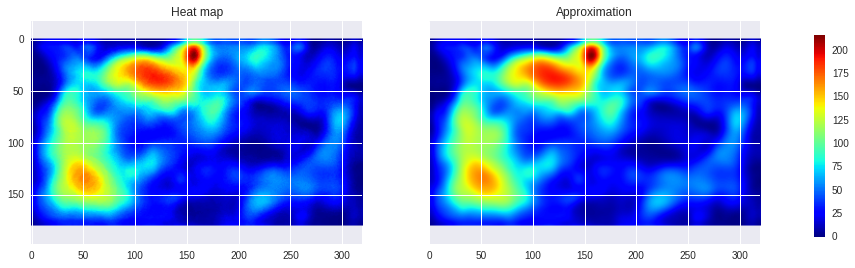

In [18]:
utils.compare_2d(hm, hm_approx)


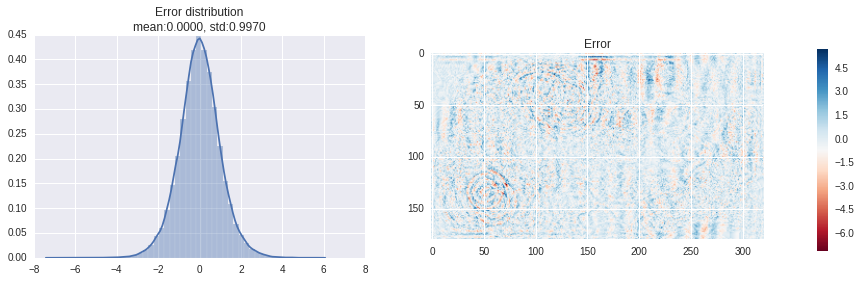

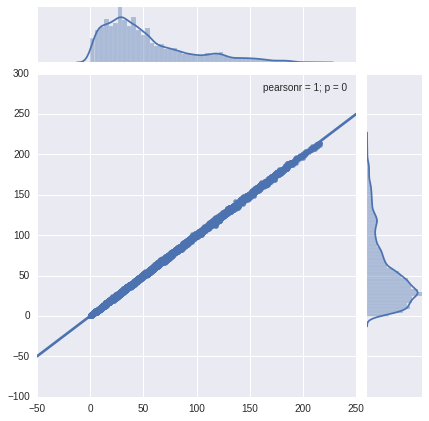

In [19]:
utils.err(hm, hm_approx)


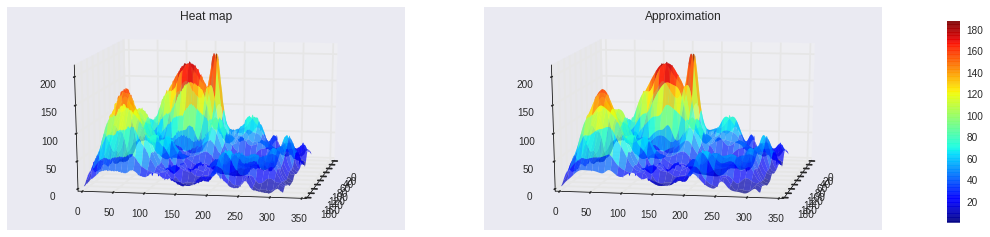

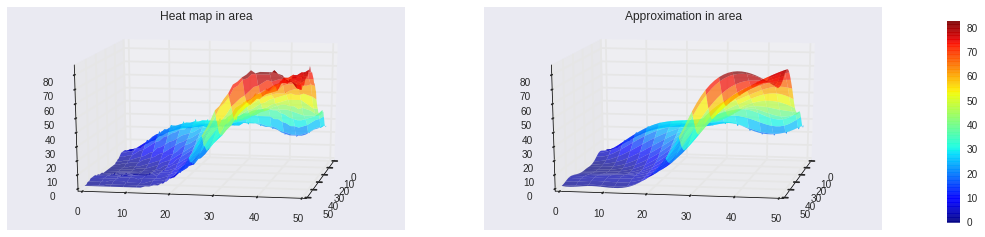

In [20]:
utils.compare_3d(hm, hm_approx)
utils.compare_3d(hm_area, hm_approx_area, stride=3, title_left='Heat map in area', title_right='Approximation in area')
